In [46]:
import importlib
import subprocess
import sys

def install_and_import(package):
    try:
        # Try importing the package
        module = importlib.import_module(package)
        print(f"{package} {module.__version__} is already installed.")
    except ImportError:
        # If not installed, install the package and import it
        print(f"{package} not found. Installing...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        module = importlib.import_module(package);
        print(package, module.__version__)
    return module



# Example usage with common data science modules
""" pandas = install_and_import('pandas')
numpy = install_and_import('numpy')
matplotlib = install_and_import('matplotlib')
seaborn= install_and_import("seaborn") """

#pincecone=install_and_import("pinecone");
st=install_and_import("sentence_transformers");
# Now you can use pandas, numpy, and matplotlib as usual
#print(pandas.__version__)


sentence_transformers not found. Installing...
sentence_transformers 3.3.0


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
data = {
    'category': ['A', 'B', 'C', 'D', 'E'],
    'value': np.random.randint(1, 100, 5)
}

# Create a DataFrame
df = pd.DataFrame(data)
df


,category,value
0,A,68
1,B,42
2,C,49
3,D,49
4,E,2


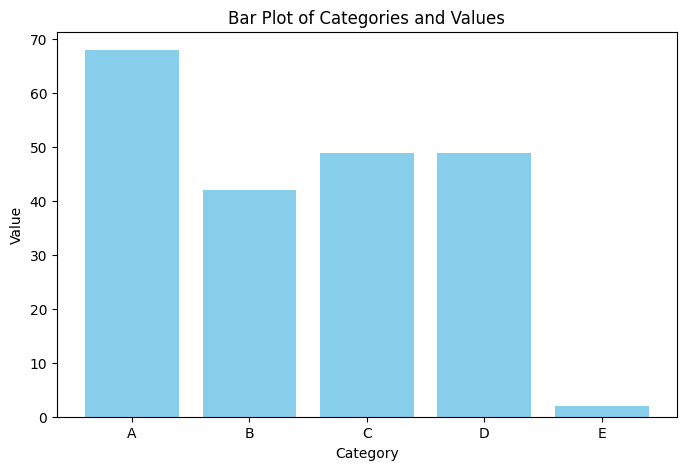

In [9]:
# Basic bar plot
plt.figure(figsize=(8, 5))
plt.bar(df['category'], df['value'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Bar Plot of Categories and Values')
plt.show()


In [18]:
# Summary statistics
summary = df.describe()
summary

# Identify the max value and associated category
max_value = df[df['value'] == df['value'].max()];





,value
count,5.000000
mean,42.000000
std,24.361855
min,2.000000
25%,42.000000
50%,49.000000
75%,49.000000
max,68.000000


,value
count,4.000000
mean,27.500000
std,13.228757
min,10.000000
25%,21.250000
50%,30.000000
75%,36.250000
max,40.000000


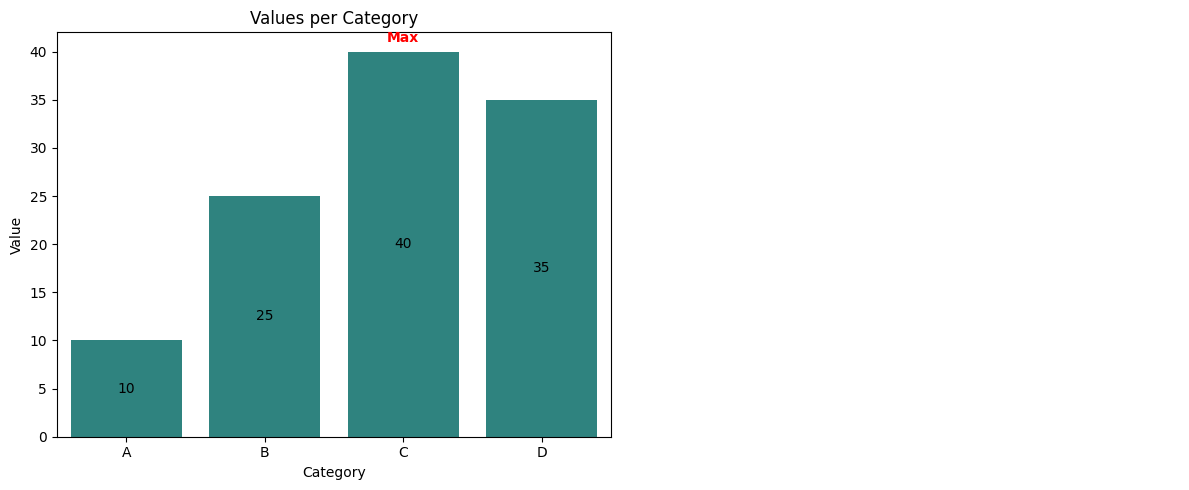

,category,value
2,C,40


In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Sample DataFrame
data = {
    'category': ['A', 'B', 'C', 'D'],
    'value': [10, 25, 40, 35]
}
df = pd.DataFrame(data)

# Summary statistics
summary = df.describe()

# Identify the max value and associated category
max_value = df[df['value'] == df['value'].max()]

# Set up the display layout
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot a bar chart of 'value' per 'category'
sns.barplot(data=df, x='category', y='value', ax=ax[0], palette='viridis',hue=1, legend=False)
ax[0].set_title('Values per Category')
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Value')

# Highlight max value
ax[0].bar_label(ax[0].containers[0], label_type='center')
highlight = max_value.iloc[0]
ax[0].text(highlight['category'], highlight['value'] + 1, 'Max', ha='center', color='red', fontweight='bold')

# Plot summary statistics with stylized DataFrame
ax[1].axis('off')  # Remove axes for the second subplot
display(HTML("<h3>Summary Statistics</h3>"))
display(summary.style.background_gradient(cmap='YlGnBu').set_caption("Descriptive Statistics"))

plt.tight_layout()
plt.show()

# Display max value as a styled table
display(HTML("<h3>Max Value and Associated Category</h3>"))
display(max_value.style.highlight_max(color='lightcoral', axis=0).set_caption("Highest Value in the Data"))


In [22]:
import pandas as pd
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression

# Load your CSV data
data = pd.read_csv('GDP(Germany).csv')

# Check the first few rows of your data to confirm structure
print(data.head())

# Define dependent variable (GDP) and independent variables
X = data[['Education Expenditure', 'Unemployment Rate', 'Employee Compensation']]
y = data['GDP']

# Add a constant term to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary to check coefficients, F-statistic, and p-value
print(model.summary())

# Extract the F-statistic and p-value from the model's summary
f_statistic = model.fvalue
p_value = model.f_pvalue
print("____________________________");
print(f'---------------------\n\n\nF-statistic: {f_statistic}')
print(f'P-value: {p_value}')

reg=LinearRegression(); 
reg.fit(X, y)
# Add a constant term to the model (intercept)


print(f"Coefficients: {reg.coef_}")  # Coefficients for R&D Expenditure, Administration Expenditure, Marketing Expenditure
print(f"Intercept: {reg.intercept_}")  # Intercept (bias term)


       GDP  Education Expenditure  Unemployment Rate  Employee Compensation
0  2109090                  85801                7.9                1120347
1  2172540                  90097                8.0                1138370
2  2198120                  91509                8.8                1145070
3  2211570                  92245                9.9                1148715
4  2262520                  92778               10.9                1152296
                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     286.5
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           1.84e-13
Time:                        00:35:04   Log-Likelihood:                -232.24
No. Observations:                  19   AIC:                          

c:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


In [16]:
import pandas as pd
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression

# Load your CSV data
data = pd.read_csv('Arizona.csv')

# Check the first few rows of your data to confirm structure
print(data.head())

# Define dependent variable (GDP) and independent variables
y = data['House Price']
X = data.drop(['House Price'],axis=1)
reg=LinearRegression(); 
reg.fit(X, y)
# Add a constant term to the model (intercept)
print(reg)

print(f"Coefficients: {reg.coef_}")  # Coefficients for R&D Expenditure, Administration Expenditure, Marketing Expenditure
print(f"Intercept: {reg.intercept_}")  # Intercept (bias term)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary to check coefficients, F-statistic, and p-value
print(model.summary())

# Extract the F-statistic and p-value from the model's summary
f_statistic = model.fvalue
p_value = model.f_pvalue

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')


   House Price  House Size (s.f.)
0       338200        1489.867841
1       283000        1263.392857
2       267680        1211.221719
3       313000        1384.955752
4       231000        1050.000000
LinearRegression()
Coefficients: [222.71322282]
Intercept: 1196.5011510457261
                            OLS Regression Results                            
Dep. Variable:            House Price   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.212e+05
Date:                Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:13:12   Log-Likelihood:                -9451.3
No. Observations:                 999   AIC:                         1.891e+04
Df Residuals:                     997   BIC:                         1.892e+04
Df Model:                           1                                         
Covaria